<heading><b>Regression Model Development (Individual)</b></heading>
<body>Machine Learning | MsBA | Hult International Business School<br>
Wai Hoi Li
</body>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [1]:
# libraries import
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.formula.api as smf
import gender_guesser.detector as gender
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import itertools

In [2]:
# print options setting and load file
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = "./datasets/Apprentice_Chef_Dataset.xlsx"

Achef_data = pd.read_excel(io = file)

<h1>Data Exploration</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [3]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {Achef_data.shape[0]}
Features:     {Achef_data.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [4]:
# list out all the columns name
Achef_data.keys()

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [5]:
# print out the first 5 rows to investigate what types of data are in the dataframe
Achef_data.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [6]:
# explore the data type of each columns to make sure all are in correct format
Achef_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [7]:
# descriptive statistics for numeric data
Achef_data.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [8]:
# Find out is there any missing value in the dataset
Achef_data.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [9]:
# Fill in the missing value in the dataset with 0
Achef_data['FAMILY_NAME'] = Achef_data['FAMILY_NAME'].fillna(0)
Achef_data.isnull().any().any()

False

<body>
It is clear that almost all variables are not equal distributed.<br><br>
Also, after looking through all the description and information of the dataset, the columns are separated based on their characteristic.  
    
<b>CONTINUOUS</b><br>
REVENUE, AVG_TIME_PER_SITE_VISIT, AVG_PREP_VID_TIME



<b>INTERVAL/COUNT</b><br>
TOTAL_MEALS_ORDERED, UNIQUE_MEALS_PURCH, CONTACTS_W_CUSTOMER_SERVICE, PRODUCT_CATEGORIES_VIEWED, CANCELLATIONS_BEFORE_NOON, CANCELLATIONS_AFTER_NOON, WEEKLY_PLAN, EARLY_DELIVERIES, LATE_DELIVERIES, LARGEST_ORDER_SIZE, MASTER_CLASSES_ATTENDED, MEDIAN_MEAL_RATING, AVG_CLICKS_PER_VISIT, TOTAL_PHOTOS_VIEWED,
MOBILE_LOGINS



<b>CATEGORICAL</b><br>
NAME, EMAIL, FIRST_NAME, FAMILY_NAME, CROSS_SELL_SUCCESS, MOBILE_NUMBER, PACKAGE_LOCKER, REFRIGERATED_LOCKER
</body>

<h1>Model building</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Base Model</h2>
<body>
Following we will first find out the correlation of all numerical variables with the y variable (i.e, Revenue), and build a base model based on the chosen x variables.
</body>

In [10]:
# creating a list of continuous features (including Sale_Price)
all_Achef_data = Achef_data.describe().keys()
# developing a correlation matrix based on continuous features
all_Achef_data_corr = Achef_data[all_Achef_data].corr(method = 'pearson')

# filtering the results to only show correlations with Sale_Price
all_Achef_data_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
MOBILE_NUMBER                  0.03
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
TASTES_AND_PREFERENCES         0.01
CANCELLATIONS_BEFORE_NOON      0.01
WEEKLY_PLAN                    0.01
REFRIGERATED_LOCKER           -0.00
EARLY_DELIVERIES              -0.00
CROSS_SELL_SUCCESS             0.00
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

In [11]:
lm_best = smf.ols(formula =  """REVENUE ~ CROSS_SELL_SUCCESS+
                                TOTAL_MEALS_ORDERED+
                                UNIQUE_MEALS_PURCH+
                                CONTACTS_W_CUSTOMER_SERVICE+
                                AVG_TIME_PER_SITE_VISIT+
                                AVG_PREP_VID_TIME+
                                LARGEST_ORDER_SIZE+
                                MASTER_CLASSES_ATTENDED+
                                MEDIAN_MEAL_RATING+
                                TOTAL_PHOTOS_VIEWED+
                                CANCELLATIONS_AFTER_NOON+
                                MOBILE_LOGINS+
                                AVG_CLICKS_PER_VISIT+
                                PRODUCT_CATEGORIES_VIEWED""",
                                data = Achef_data)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:30:00   Log-Likelihood:                -15462.
No. Observations:                1946   AIC:                         3.095e+04
Df Residuals:                    1931   BIC:                         3.104e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<h3>Trnasformation</h3>

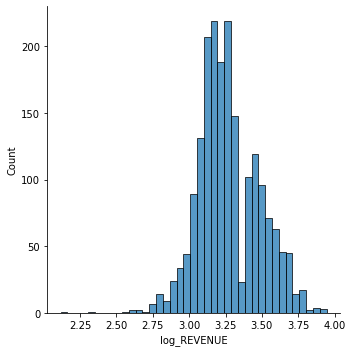

In [12]:
# tansform the variable, revenue with log and generate histogram to find out if it becomes equally distributed.
Achef_data['log_REVENUE'] = np.log10(Achef_data['REVENUE'])
sns.displot(Achef_data['log_REVENUE'])

In [13]:
# transform the variable and save it in the OG data
Achef_data['log_TOTAL_MEALS_ORDERED'] = np.log10(Achef_data['TOTAL_MEALS_ORDERED'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['TOTAL_MEALS_ORDERED',
                             'log_TOTAL_MEALS_ORDERED',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['TOTAL_MEALS_ORDERED', 'log_TOTAL_MEALS_ORDERED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
TOTAL_MEALS_ORDERED,0.60,0.61
log_TOTAL_MEALS_ORDERED,0.61,0.69


In [14]:
# transform the variable and save it in the OG data
Achef_data['log_LARGEST_ORDER_SIZE'] = np.log10(Achef_data['LARGEST_ORDER_SIZE'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['LARGEST_ORDER_SIZE',
                             'log_LARGEST_ORDER_SIZE',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45


In [15]:
# transform the variable and save it in the OG data
Achef_data['log_AVG_CLICKS_PER_VISIT'] = np.log10(Achef_data['AVG_CLICKS_PER_VISIT'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['AVG_CLICKS_PER_VISIT',
                             'log_AVG_CLICKS_PER_VISIT',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_CLICKS_PER_VISIT,-0.55,-0.58
log_AVG_CLICKS_PER_VISIT,-0.56,-0.58


In [16]:
# transform the variable and save it in the OG data
Achef_data['log_AVG_PREP_VID_TIME'] = np.log10(Achef_data['AVG_PREP_VID_TIME'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['AVG_PREP_VID_TIME',
                             'log_AVG_PREP_VID_TIME',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['AVG_PREP_VID_TIME', 'log_AVG_PREP_VID_TIME'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_PREP_VID_TIME,0.64,0.65
log_AVG_PREP_VID_TIME,0.63,0.67


In [17]:
# transform the variable and save it in the OG data
Achef_data['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(Achef_data['CONTACTS_W_CUSTOMER_SERVICE'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE',
                             'log_CONTACTS_W_CUSTOMER_SERVICE',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05


In [18]:
# transform the variable and save it in the OG data
Achef_data['log_UNIQUE_MEALS_PURCH'] = np.log10(Achef_data['UNIQUE_MEALS_PURCH'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['UNIQUE_MEALS_PURCH',
                             'log_UNIQUE_MEALS_PURCH',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['UNIQUE_MEALS_PURCH', 'log_UNIQUE_MEALS_PURCH'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
UNIQUE_MEALS_PURCH,-0.06,-0.08
log_UNIQUE_MEALS_PURCH,-0.12,-0.13


In [19]:
# transform the variable and save it in the OG data
Achef_data['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(Achef_data['AVG_TIME_PER_SITE_VISIT'])

# Find the the correclation of the logged variables
log_corr = Achef_data.loc[ : , ['AVG_TIME_PER_SITE_VISIT',
                             'log_AVG_TIME_PER_SITE_VISIT',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
AVG_TIME_PER_SITE_VISIT,0.14,0.14
log_AVG_TIME_PER_SITE_VISIT,0.15,0.15


In [20]:
# Find out the updated correlation after the transformation
df_corr = Achef_data.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
log_AVG_PREP_VID_TIME              0.63
log_TOTAL_MEALS_ORDERED            0.61
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
TOTAL_PHOTOS_VIEWED                0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
log_LARGEST_ORDER_SIZE             0.42
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
log_AVG_TIME_PER_SITE_VISIT        0.15
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
MOBILE_NUMBER                      0.03
PRODUCT_CATEGORIES_VIEWED          0.03
PC_LOGINS                          0.02
WEEKLY_PLAN                        0.01
TASTES_AND_PREFERENCES             0.01
CANCELLATIONS_BEFORE_NOON          0.01
CROSS_SELL_SUCCESS                 0.00
EARLY_DELIVERIES                  -0.00
REFRIGERATED_LOCKER               -0.00
LATE_DELIVERIES                   -0.01


In [21]:
Achef_data.keys()
# looping to make x-variables suitable for statsmodels
for val in Achef_data.keys():
    print(f"{val} +")

REVENUE +
CROSS_SELL_SUCCESS +
NAME +
EMAIL +
FIRST_NAME +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_LARGEST_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
log_AVG_PREP_VID_TIME +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_UNIQUE_MEALS_PURCH +
log_AVG_TIME_PER_SITE_VISIT +


In [22]:
lm_full = smf.ols(formula = """log_REVENUE ~ CROSS_SELL_SUCCESS+
                                            CANCELLATIONS_AFTER_NOON+
                                            MASTER_CLASSES_ATTENDED+
                                            MOBILE_LOGINS+
                                            TOTAL_PHOTOS_VIEWED+
                                            log_LARGEST_ORDER_SIZE+
                                            MEDIAN_MEAL_RATING+
                                            log_TOTAL_MEALS_ORDERED+
                                            log_AVG_CLICKS_PER_VISIT+
                                            log_AVG_PREP_VID_TIME+
                                            log_CONTACTS_W_CUSTOMER_SERVICE+
                                            log_UNIQUE_MEALS_PURCH+
                                            PRODUCT_CATEGORIES_VIEWED+
                                            log_AVG_TIME_PER_SITE_VISIT""",
                                            data = Achef_data)
                                        
# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     367.5
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:30:01   Log-Likelihood:                 1523.2
No. Observations:                1946   AIC:                            -3016.
Df Residuals:                    1931   BIC:                            -2933.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.6630      0.109     15.224      0.000       1.449       1.877
CROSS_SELL_SUCCESS                 -0.0122      0.005     -2.259      0.024      -0.023      -0.002
CANCELLATIONS_AFTER_NOON           -0.0109      0.006     -1.868      0.062      -0.022       0.001
MASTER_CLASSES_ATTENDED             0.0298      0.005      6.452      0.000       0.021       0.039
MOBILE_LOGINS                      -0.0035      0.005     -0.738      0.460      -0.013       0.006
TOTAL_PHOTOS_VIEWED              9.028e-05   1.58e-05      5.730      0.000    5.94e-05       0.000
log_LARGEST_ORDER_SIZE             -0.1334      0.027     -4.992      0.000      -0.186      -0.081
MEDIAN_MEAL_RATING                  0.0589      0.007      8.744      0.000       0.046       0.072
log_TOTAL_MEALS_ORDERED             0.2591      0.011     23.466      0.000       0.237       0.281
log_AVG_CLICKS_PER_VISIT           -0.0913      0.061     -1.506      0.132      -0.210       0.028
log_AVG_PREP_VID_TIME               0.5519      0.036     15.126      0.000       0.480       0.623
log_CONTACTS_W_CUSTOMER_SERVICE     0.1248      0.019      6.700      0.000       0.088       0.161
log_UNIQUE_MEALS_PURCH             -0.1592      0.010    -16.323      0.000      -0.178      -0.140
PRODUCT_CATEGORIES_VIEWED           0.0017      0.001      2.086      0.037       0.000       0.003
log_AVG_TIME_PER_SITE_VISIT        -0.0230      0.013     -1.777      0.076      -0.048       0.002
==============================================================================
Omnibus:                      237.971   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.424
Skew:                          -0.532   Prob(JB):                    4.67e-214
Kurtosis:                       6.314   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Optimization/ Creating dummies</h3>

In [23]:
# placeholder list
placeholder_lst = []

# looping over each Achef_data address
for index, col in Achef_data.iterrows():
    
    # splitting email domain at '@'
    split_email = Achef_data.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [24]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_name_lst = []

# looping over each email address
for index, col in email_df.iterrows():
    
    # splitting email domain at '@'
    split_email = email_df.loc[index, 0].split(sep = ".")
    
    # appending placeholder_lst with the results
    placeholder_name_lst.append(split_email)


# converting placeholder_lst into a DataFrame 
email_name_df = pd.DataFrame(placeholder_name_lst)


# displaying the results
email_name_df = email_name_df.iloc[:,0:2]
email_name_df.columns = ['F_N','L_N']
email_name_df['domain_name'] = email_df.iloc[:,1]
email_name_df

,F_N,L_N,domain_name
0,saathos,None,unitedhealth.com
1,alysanne,osgrey,ge.org
2,edwyd,fossoway,jnj.com
3,eleyna,westerling,ge.org
4,elyn,norridge,jnj.com
...,...,...,...
1941,obara,sand,yahoo.com
1942,quentyn,blackwood,yahoo.com
1943,rhonda,rowan,gmail.com
1944,turnip,None,yahoo.com


In [25]:
Achef_data['DOMAIN_NAME'] = email_name_df.iloc[:,2]

In [26]:
professional_email = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 
                      'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 
                      'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                      'mcdonalds.com', 'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 
                      'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com', 'walmart.com']

personal_email = ['gmail.com', 'yahoo.com', 'protonmail.com']

junk_email = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

In [27]:
# dummies variable for total photo viewed
Achef_data['professional_email']   = 0


for index, value in Achef_data.iterrows():
    
    for i in professional_email:
    
        # Total_Bsmt_SF
        if Achef_data.loc[index, 'DOMAIN_NAME'] == i:
            Achef_data.loc[index, 'professional_email'] = 1

Achef_data[['professional_email']].head(n = 5)

,professional_email
0,1
1,1
2,1
3,1
4,1


In [28]:
# developing a small correlation matrix
zeroes_corr = Achef_data.corr()


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                                   # Y-variable
               ['professional_email']] \
                .sort_values(ascending = False)

professional_email    0.003942
Name: log_REVENUE, dtype: float64

In [29]:
# dummies variable for total photo viewed
Achef_data['personal_email']   = 0


for index, value in Achef_data.iterrows():
    
    for i in professional_email:
    
        # Total_Bsmt_SF
        if Achef_data.loc[index, 'DOMAIN_NAME'] == i:
            Achef_data.loc[index, 'personal_email'] = 1

Achef_data[['personal_email']].head(n = 5)

,personal_email
0,1
1,1
2,1
3,1
4,1


In [30]:
# developing a small correlation matrix
zeroes_corr = Achef_data.corr()


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                                   # Y-variable
               ['personal_email']] \
                .sort_values(ascending = False)

personal_email    0.003942
Name: log_REVENUE, dtype: float64

In [31]:
# dummies variable for total photo viewed
Achef_data['junk_email']   = 0


for index, value in Achef_data.iterrows():
    
    for i in professional_email:
    
        # Total_Bsmt_SF
        if Achef_data.loc[index, 'DOMAIN_NAME'] == i:
            Achef_data.loc[index, 'junk_email'] = 1

Achef_data[['junk_email']].head(n = 5)

,junk_email
0,1
1,1
2,1
3,1
4,1


In [32]:
# developing a small correlation matrix
zeroes_corr = Achef_data.corr()


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                                   # Y-variable
               ['junk_email']] \
                .sort_values(ascending = False)

junk_email    0.003942
Name: log_REVENUE, dtype: float64

In [33]:
# counting the number of zeroes for 
TPhoto_zeroes   = len(Achef_data['TOTAL_PHOTOS_VIEWED'][Achef_data['TOTAL_PHOTOS_VIEWED']==0]) # Total_Bsmt_SF

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Total Photo       | {TPhoto_zeroes}\t\t{len(Achef_data) - TPhoto_zeroes}
Total Photo       | {round((TPhoto_zeroes/(TPhoto_zeroes+len(Achef_data) - TPhoto_zeroes)*100),2)} %\t\t{round((len(Achef_data) - TPhoto_zeroes)/(TPhoto_zeroes+len(Achef_data) - TPhoto_zeroes)*100,2)} %

""")


                 No		Yes
               ---------------------
Total Photo       | 1140		806
Total Photo       | 58.58 %		41.42 %




In [34]:
# dummies variable for total photo viewed
Achef_data['viewes_photo']   = 0


for index, value in Achef_data.iterrows():
    
    # Total_Bsmt_SF
    if Achef_data.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        Achef_data.loc[index, 'viewes_photo'] = 1
        
Achef_data[['viewes_photo']].head(n = 5)

,viewes_photo
0,0
1,1
2,0
3,0
4,1


In [35]:
# developing a small correlation matrix
zeroes_corr = Achef_data.corr()


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                                   # Y-variable
               ['viewes_photo']] \
                .sort_values(ascending = False)

viewes_photo    0.393012
Name: log_REVENUE, dtype: float64

In [36]:
perce_achef = Achef_data.describe(include = 'number').round(2)
perce_achef

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,log_AVG_PREP_VID_TIME,log_CONTACTS_W_CUSTOMER_SERVICE,log_UNIQUE_MEALS_PURCH,log_AVG_TIME_PER_SITE_VISIT,professional_email,personal_email,junk_email,viewes_photo
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,3.27,1.77,0.62,1.12,2.16,0.82,0.62,1.94,0.36,0.36,0.36,0.41
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.21,0.32,0.16,0.08,0.14,0.15,0.27,0.22,0.48,0.48,0.48,0.49
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,2.12,1.04,0.00,0.70,1.52,0.00,0.00,1.01,0.00,0.00,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,3.13,1.59,0.48,1.08,2.06,0.70,0.48,1.86,0.00,0.00,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,3.24,1.78,0.60,1.11,2.16,0.85,0.70,1.97,0.00,0.00,0.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,3.43,1.98,0.70,1.18,2.24,0.90,0.85,2.07,1.00,1.00,1.00,1.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,3.94,2.69,1.04,1.28,2.75,1.26,1.28,3.22,1.00,1.00,1.00,1.00


In [37]:
drop_drop_Achef_data = Achef_data.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN_NAME'],
                                axis = 1)

per_25 = perce_achef.loc['25%']
per_25_df = per_25.to_frame()
per_75 = perce_achef.loc['75%']
per_75_df = per_75.to_frame()

rnew_data = []
for n in range (0,36):
    rnew_data.append(drop_drop_Achef_data.keys()[n])
    for r in range (0,1946):
        if drop_drop_Achef_data.iloc[r,n] <= per_25_df.iloc[n,0] or drop_drop_Achef_data.iloc[r,n] >= per_75_df.iloc[n,0]:
            rnew_data.append('1')
        elif drop_drop_Achef_data.iloc[r,n] >= per_25_df.iloc[n,0] or drop_drop_Achef_data.iloc[r,n] <= per_75_df.iloc[n,0]:
            rnew_data.append('0')
        else:
            rnew_data.append(drop_drop_Achef_data.iloc[r,n])

In [38]:
Achef_data.keys()

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_TOTAL_MEALS_ORDERED', 'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'log_AVG_PREP_VID_TIME', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_UNIQUE_MEALS_PURCH', 'log_AVG_TIME_PER_SITE_VISIT', 'DOMAIN_NAME', 'professional_email', 'personal_email', 'junk_email', 'viewes_photo'], dtype='object')

In [39]:
drop_drop_Achef_data = Achef_data.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN_NAME'],
                                axis = 1)

per_25 = perce_achef.loc['25%']
per_25_df = per_25.to_frame()
per_75 = perce_achef.loc['75%']
per_75_df = per_75.to_frame()

rnew_data = pd.DataFrame().reindex_like(drop_drop_Achef_data)

rnew_data = rnew_data.rename(index = str, columns = {'REVENUE':'outliers_REVENUE', 
                             'CROSS_SELL_SUCCESS':'outliers_CROSS_SELL_SUCCESS', 
                             'TOTAL_MEALS_ORDERED':'outliers_TOTAL_MEALS_ORDERED', 
                             'UNIQUE_MEALS_PURCH':'outliers_UNIQUE_MEALS_PURCH', 
                             'CONTACTS_W_CUSTOMER_SERVICE':'outliers_CONTACTS_W_CUSTOMER_SERVICE', 
                             'PRODUCT_CATEGORIES_VIEWED':'outliers_PRODUCT_CATEGORIES_VIEWED', 
                             'AVG_TIME_PER_SITE_VISIT':'outliers_AVG_TIME_PER_SITE_VISIT', 
                             'MOBILE_NUMBER':'outliers_MOBILE_NUMBER', 
                             'CANCELLATIONS_BEFORE_NOON':'outliers_CANCELLATIONS_BEFORE_NOON', 
                             'CANCELLATIONS_AFTER_NOON':'outliers_CANCELLATIONS_AFTER_NOON', 
                             'TASTES_AND_PREFERENCES':'outliers_TASTES_AND_PREFERENCES', 
                             'PC_LOGINS':'outliers_PC_LOGINS', 
                             'MOBILE_LOGINS':'outliers_MOBILE_LOGINS', 
                             'WEEKLY_PLAN':'outliers_WEEKLY_PLAN', 
                             'EARLY_DELIVERIES':'outliers_EARLY_DELIVERIES', 
                             'LATE_DELIVERIES':'outliers_LATE_DELIVERIES', 
                             'PACKAGE_LOCKER':'outliers_PACKAGE_LOCKER', 
                             'REFRIGERATED_LOCKER':'outliers_REFRIGERATED_LOCKER', 
                             'AVG_PREP_VID_TIME':'outliers_AVG_PREP_VID_TIME', 
                             'LARGEST_ORDER_SIZE':'outliers_LARGEST_ORDER_SIZE', 
                             'MASTER_CLASSES_ATTENDED':'outliers_MASTER_CLASSES_ATTENDED', 
                             'MEDIAN_MEAL_RATING':'outliers_MEDIAN_MEAL_RATING', 
                             'AVG_CLICKS_PER_VISIT':'outliers_AVG_CLICKS_PER_VISIT', 
                             'TOTAL_PHOTOS_VIEWED':'outliers_TOTAL_PHOTOS_VIEWED', 
                             'log_REVENUE':'outliers_log_REVENUE', 
                             'log_TOTAL_MEALS_ORDERED':'outliers_log_TOTAL_MEALS_ORDERED', 
                             'log_LARGEST_ORDER_SIZE':'outliers_log_LARGEST_ORDER_SIZE', 
                             'log_AVG_CLICKS_PER_VISIT':'outliers_log_AVG_CLICKS_PER_VISIT', 
                             'log_AVG_PREP_VID_TIME':'outliers_log_AVG_PREP_VID_TIME', 
                             'log_CONTACTS_W_CUSTOMER_SERVICE':'outliers_log_CONTACTS_W_CUSTOMER_SERVICE', 
                             'log_UNIQUE_MEALS_PURCH':'outliers_log_UNIQUE_MEALS_PURCH', 
                             'log_AVG_TIME_PER_SITE_VISIT':'outliers_log_AVG_TIME_PER_SITE_VISIT', 
                             'professional_email':'outliers_professional_email', 
                             'personal_email':'outliers_personal_email', 
                             'junk_email':'outliers_junk_email', 
                             'viewes_photo':'outliers_viewes_photo', 
                             'Torder_vs_productViewed':'outliers_Torder_vs_productViewed', 
                             'UMeal_vs_productViewed':'outliers_UMeal_vs_productViewed', 
                             'decision_time':'outliers_decision_time', 
                             'UMeal_vs_Torder':'outliers_UMeal_vs_Torder', 
                             'Torder_vs_Revenue':'outliers_Torder_vs_Revenue', 
                             'UMeal_vs_Revenue':'outliers_UMeal_vs_Revenue', 
                             'Tcancel_vs_Torder':'outliers_Tcancel_vs_Torder', 
                             'WPlan_vs_Torder':'outliers_WPlan_vs_Torder', 
                             'WPlan_vs_UMeal':'outliers_WPlan_vs_UMeal', 
                             'Contact_vs_Torder':'outliers_Contact_vs_Torder', 
                             'Contact_vs_UMeal':'outliers_Contact_vs_UMeal', 
                             'UNKNOWN':'outliers_UNKNOWN', 
                             'MALE':'outliers_MALE', 
                             'FEMALE':'outliers_FEMALE'})   

for n in range (0,36):
    for r in range (0,1946):
        if drop_drop_Achef_data.iloc[r,n] <= per_25_df.iloc[n,0] or drop_drop_Achef_data.iloc[r,n] >= per_75_df.iloc[n,0]:
            rnew_data.iloc[r,n] = 1
        elif drop_drop_Achef_data.iloc[r,n] >= per_25_df.iloc[n,0] or drop_drop_Achef_data.iloc[r,n] <= per_75_df.iloc[n,0]:
            rnew_data.iloc[r,n] = 0
        else:
            rnew_data.iloc[r,n] = drop_drop_Achef_data.iloc[r,n]

In [40]:
rnew_data.head(n = 5)

,outliers_REVENUE,outliers_CROSS_SELL_SUCCESS,outliers_TOTAL_MEALS_ORDERED,outliers_UNIQUE_MEALS_PURCH,outliers_CONTACTS_W_CUSTOMER_SERVICE,outliers_PRODUCT_CATEGORIES_VIEWED,outliers_AVG_TIME_PER_SITE_VISIT,outliers_MOBILE_NUMBER,outliers_CANCELLATIONS_BEFORE_NOON,outliers_CANCELLATIONS_AFTER_NOON,outliers_TASTES_AND_PREFERENCES,outliers_PC_LOGINS,outliers_MOBILE_LOGINS,outliers_WEEKLY_PLAN,outliers_EARLY_DELIVERIES,outliers_LATE_DELIVERIES,outliers_PACKAGE_LOCKER,outliers_REFRIGERATED_LOCKER,outliers_AVG_PREP_VID_TIME,outliers_LARGEST_ORDER_SIZE,outliers_MASTER_CLASSES_ATTENDED,outliers_MEDIAN_MEAL_RATING,outliers_AVG_CLICKS_PER_VISIT,outliers_TOTAL_PHOTOS_VIEWED,outliers_log_REVENUE,outliers_log_TOTAL_MEALS_ORDERED,outliers_log_LARGEST_ORDER_SIZE,outliers_log_AVG_CLICKS_PER_VISIT,outliers_log_AVG_PREP_VID_TIME,outliers_log_CONTACTS_W_CUSTOMER_SERVICE,outliers_log_UNIQUE_MEALS_PURCH,outliers_log_AVG_TIME_PER_SITE_VISIT,outliers_professional_email,outliers_personal_email,outliers_junk_email,outliers_viewes_photo
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [41]:
for val in rnew_data.keys():
    print(f" {val}:outliers_{val}, ")

 outliers_REVENUE:outliers_outliers_REVENUE, 
 outliers_CROSS_SELL_SUCCESS:outliers_outliers_CROSS_SELL_SUCCESS, 
 outliers_TOTAL_MEALS_ORDERED:outliers_outliers_TOTAL_MEALS_ORDERED, 
 outliers_UNIQUE_MEALS_PURCH:outliers_outliers_UNIQUE_MEALS_PURCH, 
 outliers_CONTACTS_W_CUSTOMER_SERVICE:outliers_outliers_CONTACTS_W_CUSTOMER_SERVICE, 
 outliers_PRODUCT_CATEGORIES_VIEWED:outliers_outliers_PRODUCT_CATEGORIES_VIEWED, 
 outliers_AVG_TIME_PER_SITE_VISIT:outliers_outliers_AVG_TIME_PER_SITE_VISIT, 
 outliers_MOBILE_NUMBER:outliers_outliers_MOBILE_NUMBER, 
 outliers_CANCELLATIONS_BEFORE_NOON:outliers_outliers_CANCELLATIONS_BEFORE_NOON, 
 outliers_CANCELLATIONS_AFTER_NOON:outliers_outliers_CANCELLATIONS_AFTER_NOON, 
 outliers_TASTES_AND_PREFERENCES:outliers_outliers_TASTES_AND_PREFERENCES, 
 outliers_PC_LOGINS:outliers_outliers_PC_LOGINS, 
 outliers_MOBILE_LOGINS:outliers_outliers_MOBILE_LOGINS, 
 outliers_WEEKLY_PLAN:outliers_outliers_WEEKLY_PLAN, 
 outliers_EARLY_DELIVERIES:outliers_outliers

In [42]:
rnew_data = rnew_data.iloc[:,1:36]
rnew_data

,outliers_CROSS_SELL_SUCCESS,outliers_TOTAL_MEALS_ORDERED,outliers_UNIQUE_MEALS_PURCH,outliers_CONTACTS_W_CUSTOMER_SERVICE,outliers_PRODUCT_CATEGORIES_VIEWED,outliers_AVG_TIME_PER_SITE_VISIT,outliers_MOBILE_NUMBER,outliers_CANCELLATIONS_BEFORE_NOON,outliers_CANCELLATIONS_AFTER_NOON,outliers_TASTES_AND_PREFERENCES,outliers_PC_LOGINS,outliers_MOBILE_LOGINS,outliers_WEEKLY_PLAN,outliers_EARLY_DELIVERIES,outliers_LATE_DELIVERIES,outliers_PACKAGE_LOCKER,outliers_REFRIGERATED_LOCKER,outliers_AVG_PREP_VID_TIME,outliers_LARGEST_ORDER_SIZE,outliers_MASTER_CLASSES_ATTENDED,outliers_MEDIAN_MEAL_RATING,outliers_AVG_CLICKS_PER_VISIT,outliers_TOTAL_PHOTOS_VIEWED,outliers_log_REVENUE,outliers_log_TOTAL_MEALS_ORDERED,outliers_log_LARGEST_ORDER_SIZE,outliers_log_AVG_CLICKS_PER_VISIT,outliers_log_AVG_PREP_VID_TIME,outliers_log_CONTACTS_W_CUSTOMER_SERVICE,outliers_log_UNIQUE_MEALS_PURCH,outliers_log_AVG_TIME_PER_SITE_VISIT,outliers_professional_email,outliers_personal_email,outliers_junk_email,outliers_viewes_photo
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1942,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1943,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1944,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [62]:
for name in rnew_data.keys():
    Achef_data[name] = rnew_data.loc[:,name]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1941    1.0
1942    1.0
1943    1.0
1944    1.0
1945    1.0
Name: outliers_CROSS_SELL_SUCCESS, Length: 1946, dtype: float64
0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1941    0.0
1942    1.0
1943    0.0
1944    0.0
1945    1.0
Name: outliers_TOTAL_MEALS_ORDERED, Length: 1946, dtype: float64
0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1941    1.0
1942    0.0
1943    1.0
1944    1.0
1945    0.0
Name: outliers_UNIQUE_MEALS_PURCH, Length: 1946, dtype: float64
0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1941    1.0
1942    0.0
1943    1.0
1944    1.0
1945    1.0
Name: outliers_CONTACTS_W_CUSTOMER_SERVICE, Length: 1946, dtype: float64
0       1.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
1941    0.0
1942    1.0
1943    0.0
1944    1.0
1945    0.0
Name: outliers_PRODUCT_CATEGORIES_VIEWED, Length: 1946, dtype: float64
0  

In [61]:
Achef_data.head(n =5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_LARGEST_ORDER_SIZE,log_AVG_CLICKS_PER_VISIT,log_AVG_PREP_VID_TIME,log_CONTACTS_W_CUSTOMER_SERVICE,log_UNIQUE_MEALS_PURCH,log_AVG_TIME_PER_SITE_VISIT,DOMAIN_NAME,professional_email,personal_email,junk_email,viewes_photo,outliers_CROSS_SELL_SUCCESS,outliers_TOTAL_MEALS_ORDERED,outliers_UNIQUE_MEALS_PURCH,outliers_CONTACTS_W_CUSTOMER_SERVICE,outliers_PRODUCT_CATEGORIES_VIEWED,outliers_AVG_TIME_PER_SITE_VISIT,outliers_MOBILE_NUMBER,outliers_CANCELLATIONS_BEFORE_NOON,outliers_CANCELLATIONS_AFTER_NOON,outliers_TASTES_AND_PREFERENCES,outliers_PC_LOGINS,outliers_MOBILE_LOGINS,outliers_WEEKLY_PLAN,outliers_EARLY_DELIVERIES,outliers_LATE_DELIVERIES,outliers_PACKAGE_LOCKER,outliers_REFRIGERATED_LOCKER,outliers_AVG_PREP_VID_TIME,outliers_LARGEST_ORDER_SIZE,outliers_MASTER_CLASSES_ATTENDED,outliers_MEDIAN_MEAL_RATING,outliers_AVG_CLICKS_PER_VISIT,outliers_TOTAL_PHOTOS_VIEWED,outliers_log_REVENUE,outliers_log_TOTAL_MEALS_ORDERED,outliers_log_LARGEST_ORDER_SIZE,outliers_log_AVG_CLICKS_PER_VISIT,outliers_log_AVG_PREP_VID_TIME,outliers_log_CONTACTS_W_CUSTOMER_SERVICE,outliers_log_UNIQUE_MEALS_PURCH,outliers_log_AVG_TIME_PER_SITE_VISIT,outliers_professional_email,outliers_personal_email,outliers_junk_email,outliers_viewes_photo,Torder_vs_productViewed,UMeal_vs_productViewed,decision_time,UMeal_vs_Torder,Torder_vs_Revenue,UMeal_vs_Revenue,Tcancel_vs_Torder,WPlan_vs_Torder,WPlan_vs_UMeal,Contact_vs_Torder,Contact_vs_UMeal,UNKNOWN,MALE,FEMALE
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,2.594393,1.146128,0.0,1.230449,1.523746,1.079181,0.778151,1.681241,unitedhealth.com,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400,0.600,0.291667,0.428571,0.035623,0.015267,0.285714,0.000000,0.000000,0.857143,2.000000,1,0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,3.135133,1.939519,0.0,1.113943,1.928396,0.903090,0.477121,1.605844,ge.org,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.875,0.375,2.156134,0.034483,0.063736,0.002198,0.000000,0.137931,4.000000,0.091954,2.666667,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,2.903090,1.176091,0.0,1.204120,1.799341,1.041393,0.845098,1.296007,jnj.com,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,1.400,0.758725,0.466667,0.018750,0.008750,0.200000,0.066667,0.142857,0.733333,1.571429,1,0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,2.778151,1.113943,0.0,1.146128,1.641474,1.041393,0.778151,1.954243,ge.org,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600,1.200,0.144444,0.461538,0.021667,0.010000,0.153846,1.076923,2.333333,0.846154,1.833333,1,0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,3.173186,1.672098,0.0,1.079181,1.928396,0.778151,0.903090,1.606166,jnj.com,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [45]:
# Create ratio to investigate the dataset
Achef_data['Torder_vs_productViewed'] = Achef_data['TOTAL_MEALS_ORDERED']/Achef_data['PRODUCT_CATEGORIES_VIEWED']
Achef_data['UMeal_vs_productViewed'] = Achef_data['UNIQUE_MEALS_PURCH']/Achef_data['PRODUCT_CATEGORIES_VIEWED']
Achef_data['decision_time'] = Achef_data['TOTAL_MEALS_ORDERED']/Achef_data['AVG_TIME_PER_SITE_VISIT']
Achef_data['UMeal_vs_Torder'] = Achef_data['UNIQUE_MEALS_PURCH']/Achef_data['TOTAL_MEALS_ORDERED']
Achef_data['Torder_vs_Revenue'] = Achef_data['TOTAL_MEALS_ORDERED']/Achef_data['REVENUE']
Achef_data['UMeal_vs_Revenue'] = Achef_data['UNIQUE_MEALS_PURCH']/Achef_data['REVENUE']
Achef_data['Tcancel_vs_Torder'] = (Achef_data['CANCELLATIONS_BEFORE_NOON']+ Achef_data['CANCELLATIONS_AFTER_NOON'])/Achef_data['TOTAL_MEALS_ORDERED']
Achef_data['WPlan_vs_Torder'] = Achef_data['WEEKLY_PLAN']/Achef_data['TOTAL_MEALS_ORDERED']
Achef_data['WPlan_vs_UMeal'] = Achef_data['WEEKLY_PLAN']/Achef_data['UNIQUE_MEALS_PURCH']
Achef_data['Contact_vs_Torder'] = Achef_data['CONTACTS_W_CUSTOMER_SERVICE']/Achef_data['TOTAL_MEALS_ORDERED']
Achef_data['Contact_vs_UMeal'] = Achef_data['CONTACTS_W_CUSTOMER_SERVICE']/Achef_data['UNIQUE_MEALS_PURCH']

In [46]:
female_name = ['Alerie', 'Alicent', 'Allyria', 'Alyce', 'Alys', 'Alysanne', 
               'Alyssa', 'Amerei', 'Anya', 'Argella', 'Arianne',
 'Arya', 'Asha', 'Ashara', 'Barbara', 'Barra', 'Bella', 'Bellonara', 'Bess', 'Beth',
 'Bethany', 'Bethany', 'Brella', 'Brienne', 'Cassana', 'Catelyn', 'Catelyn', 'Cerelle', 
 'Cersei', 'Chataya',  'Cynthea', 'Cyrelle', 'Daenerys', 'Darlessa', 'Delena', 'Desmera', 
 'Doreah', 'Dusky', 'Elia', 'Ellaria', 'Ellyn', 'Emberlei', 'Emma', 'Ermesande', 'Essie', 
 'Falyse', 'Florys', 'Genna', 'Gilly', 'Gwenys', 'Gwin', 'Gwynesse', 'Gysella', 'Harma',
 'Holly', 'Irri', 'Jayne', 'Jeyne', 'Jeyne', 'Jeyne', 'Jeyne', 'Jeyne', 'Jhiqui', 'Joanna',
 'Jocelyn', 'Jonquil', 'Kella', 'Lanna', 'Leana', 'Lelia', 'Leonella', 'Leonette', 'Lollys',
 'Lyanna', 'Lyarra', 'Lysa', 'Maege', 'Maegelle', 'Margaery', 'Margot', 'Maris', 'Mariya',
 'Marna', 'Meera', 'Meha', 'Melantha', 'Melara', 'Melesa', 'Melessa', 'Melisandre',
 'Melissa', 'Mina', 'Minisa', 'Mirri', 'Mordane', 'Mya', 'Myranda', 'Myrcella', 'Mysaria',
 'Naerys', 'Nettles', 'Nissa', 'Nymeria', 'Nymeria', 'Obara', 'Old', 'Olenna', 'Osha',
 'Penny', 'Perriane', 'Quaithe', 'Red', 'Rhaella', 'Rhaelle', 'Rhaenyra', 'Rhaenys', 'Rhaenys',
 'Rhalla', 'Rhea', 'Rhea', 'Rohanne', 'Rosey', 'Roslin', 'Rylene', 'Sansa', 'Selyse',
 'Senelle', 'Shae', 'Shella', 'Shiera', 'Shiera', 'Shireen', 'Shrykos', 'Sylvenna',
 'Taena', 'Tanda', 'Turnip', 'Tyana', 'Tyene', 'Tysane', 'Tysha', 'Valaena',
 'Visenya', 'Viserra', 'Waif', 'Walda', 'Wylla', 'Wynafryd', 'Ygritte', 'Ysilla']

In [47]:
male_name = ['Addam', 'Aemon', 'Aegon', 'Ahko', 'Alester', 'Alliser', 'Alton', 'Alyn', 'Amory', 'Arys', 
 'Baelor', 'Balon', 'Barristan', 'Ben', 'Benjen', 'Beric', 'Bowen', 'Brandon', 'Bronn', 'Bryan', 'Bryen', 'Brynden', 
 'Clarence', 'Clement', 'Cohollo', 'Daario', 'Daemon', 'Daeron', 'Dagmer', 'Damon', 'Davos', 'Denys', 'Desmond', 'Dickon', 'Donnel', 'Dontos', 'Drennan',
 'Drogo', 'Drogon', 'Eddison', 'Edmure', 'Edwyn', 'Euron', 'Eustace', 'Farlen', 'Flynn',
 'Forzo', 'Galbarte', 'Garth', 'Gawen', 'Gendry', 'Gerold', 'Grazdan', 'Gregore', 'Greizhene', 'Grenn', 'Gulian', 'Gwayne', 'Gyles', 'Gylese',
 'Haggo', 'Hallyne', 'Haralde', 'Harker', 'Harren', 'Harrold', 'Hizdahre', 'Hodor', 'Hugh', 'Humfrey', 'Illyrio',
 'Ilyn', 'Jacks', 'Jaime', 'Janos', 'Japeth', 'Jaqen', 'Jasper', 'Jeor', 'Joffrey', 'Jojen',
 'Jon', 'Jonos', 'Jorah', 'Jory', 'Joss', 'Karl', 'Kevan', 'Kovarro', 'Kurleket', 'Kyle', 'Lachlan',
 'Lancel', 'Leo', 'Lewys', 'Locke', 'Lommy', 'Loras', 'Lord', 'Lorren', 'Lorent', 'Lothar', 'Luthor', 'Lucas', 'Luwin', 'Lymond', 'Lyonel'
 'Mace', 'Mago', 'Marq', 'Malakho', 'Malko', 'Mance', 'Mandon', 'Manfred', 'Marillion', 'Maron', 'Martyn', 'Matthos', 
 'Meryn', 'Mikken', 'Mord', 'Moro', 'Mors', 'Mossador', 'Mudge', 'Myles', 'Oberyn', 'Olly', 'Olyvar',
 'Orell', 'Ormond', 'Owen', 'Pate', 'Petyr', 'Podrick', 'Polliver', 'Pyat', 'Pycelle', 'Pypar', 'Qarl', 'Qhono',
 'Qhorin', 'Qotho', 'Quellon', 'Quent', 'Quentyn', 'Rakharo', 'Ramsay', 'Rast', 'Raymun', 'Renly', 'Rhaegal',
 'Rhalko', 'Richard', 'Rickard', 'Rickon', 'Robb', 'Robert', 'Robin', 'Rodrik', 'Roger', 'Rolland', 'Ronald', 'Roose',
 'Rorge', 'Ryam', 'Salladhor', 'Samwell', 'Sandor', 'Simon', 'Stannis', 'Steffon', 'Symon', 'Symond', 'Syrio', 
 'Ternesio', 'Theon', 'Timett', 'Tristifer', 'Tobho', 'Tommen', 'Tormund', 'Triston', 'Tybolt', 'Tyrion', 'Tytos', 'Tywin', 'Ulf', 'Vardis',
 'Varys', 'Viserion', 'Viserys', 'Walder', 'Walder', 'Walton', 'Wat', 'Will', 'Willis', 'Willam', 'Willem', 'Wolkan', 'Wyl', 
 'Xaro', 'Yohn', 'Yoren']

In [48]:
# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for name in Achef_data.loc[:, 'FIRST_NAME']:
    
    if name in male_name:
        placeholder_lst.append('male')
        

    elif name in female_name:
        placeholder_lst.append('female')


    else:
            placeholder_lst.append('unknown')


# concatenating with original DataFrame
email_name_df['gender'] = pd.Series(placeholder_lst)


# checking results
email_name_df['gender'].value_counts()# guessing gender based on (given) name

unknown    1256
male        513
female      177
Name: gender, dtype: int64

In [49]:
Achef_data['UNKNOWN'] = 0
r = 0
for name in email_name_df.loc[:,'gender']:
    if name == 'unknown':
        Achef_data.loc[r, 'UNKNOWN'] = 1
        r = r + 1
    else:
        Achef_data.loc[r, 'UNKNOWN'] = 0
        r = r + 1

In [50]:
Achef_data['MALE'] = 0
r = 0
for name in email_name_df.loc[:,'gender']:
    if name == 'male' or name == 'mostly_male':
        Achef_data.loc[r, 'MALE'] = 1
        r = r + 1
    else:
        Achef_data.loc[r, 'MALE'] = 0
        r = r + 1

In [51]:
Achef_data['FEMALE'] = 0
r = 0
for name in email_name_df.loc[:,'gender']:
    if name == 'female':
        Achef_data.loc[r, 'FEMALE'] = 1
        r = r + 1
    else:
        Achef_data.loc[r, 'FEMALE'] = 0
        r = r + 1

In [52]:
# declaring set of x-variables
x_variables = Achef_data.keys()


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

REVENUE +
CROSS_SELL_SUCCESS +
NAME +
EMAIL +
FIRST_NAME +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_LARGEST_ORDER_SIZE +
log_AVG_CLICKS_PER_VISIT +
log_AVG_PREP_VID_TIME +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_UNIQUE_MEALS_PURCH +
log_AVG_TIME_PER_SITE_VISIT +
DOMAIN_NAME +
professional_email +
personal_email +
junk_email +
viewes_photo +
outliers_CROSS_SELL_SUCCESS +
outliers_TOTAL_MEALS_ORDERED +
outliers_UNIQUE_MEALS_PURCH +
outliers_CONTACTS_W_CUSTOMER_SERVICE +
outliers_PRODUCT_CATEGORIES_VIEWED +
o

In [53]:
lm_full = smf.ols(formula = """log_REVENUE ~ PRODUCT_CATEGORIES_VIEWED +
                                            CANCELLATIONS_AFTER_NOON +
                                            WEEKLY_PLAN +
                                            MEDIAN_MEAL_RATING +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_AVG_PREP_VID_TIME +
                                            log_CONTACTS_W_CUSTOMER_SERVICE +
                                            log_UNIQUE_MEALS_PURCH +
                                            professional_email +
                                            personal_email +
                                            junk_email +
                                            UMeal_vs_productViewed +
                                            decision_time +
                                            UMeal_vs_Torder +
                                            Torder_vs_Revenue +
                                            UMeal_vs_Revenue +
                                            WPlan_vs_UMeal +
                                            Contact_vs_Torder +
                                            Contact_vs_UMeal +
                                            UNIQUE_MEALS_PURCH +
                                            MALE +
                                            FEMALE""",
                                            data = Achef_data)
                                        
    
# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2042.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:30:19   Log-Likelihood:                 3276.8
No. Observations:                1946   AIC:                            -6512.
Df Residuals:                    1925   BIC:                            -6394.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.7510      0.022     78.897      0.000       1.707       1.794
PRODUCT_CATEGORIES_VIEWED           0.0011      0.000      2.217      0.027       0.000       0.002
CANCELLATIONS_AFTER_NOON           -0.0058      0.002     -2.431      0.015      -0.010      -0.001
WEEKLY_PLAN                        -0.0002      0.000     -1.725      0.085      -0.000    2.82e-05
MEDIAN_MEAL_RATING                  0.0099      0.002      5.346      0.000       0.006       0.014
log_TOTAL_MEALS_ORDERED             0.8898      0.013     68.931      0.000       0.865       0.915
log_AVG_PREP_VID_TIME               0.0783      0.010      7.479      0.000       0.058       0.099
log_CONTACTS_W_CUSTOMER_SERVICE    -0.0548      0.014     -4.036      0.000      -0.081      -0.028
log_UNIQUE_MEALS_PURCH             -0.0358      0.024     -1.477      0.140      -0.083       0.012
professional_email                 -0.0011      0.001     -1.554      0.120      -0.003       0.000
personal_email                     -0.0011      0.001     -1.554      0.120      -0.003       0.000
junk_email                         -0.0011      0.001     -1.554      0.120      -0.003       0.000
UMeal_vs_productViewed              0.0023      0.001      2.051      0.040       0.000       0.005
decision_time                       0.0013      0.002      0.640      0.522      -0.003       0.005
UMeal_vs_Torder                     0.2623      0.028      9.335      0.000       0.207       0.317
Torder_vs_Revenue                  -8.2216      0.118    -69.486      0.000      -8.454      -7.990
UMeal_vs_Revenue                  -13.3967      0.933    -14.360      0.000     -15.226     -11.567
WPlan_vs_UMeal                      0.0004      0.000      1.275      0.202      -0.000       0.001
Contact_vs_Torder                   0.0887      0.016      5.658      0.000       0.058       0.120
Contact_vs_UMeal                    0.0223      0.002     11.435      0.000       0.018       0.026
UNIQUE_MEALS_PURCH                  0.0115      0.002      6.033      0.000       0.008       0.015
MALE                               -0.0007      0.002     -0.312      0.755      -0.005       0.004
FEMALE                             -0.0032      0.004     -0.867      0.386      -0.010       0.004
==============================================================================
Omnibus:                      546.527   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7076.136
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                      12.148   Cond. No.                     2.76e+18
==============================================================================

Notes:
[

<h2>OLS Model</h2>

In [54]:
# preparing explanatory variable data
drop_Achef_data = Achef_data.drop(['REVENUE','log_REVENUE', 'NAME', 'EMAIL', 
                                   'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN_NAME', 
                                   'LARGEST_ORDER_SIZE', 'AVG_CLICKS_PER_VISIT',
                                   'AVG_PREP_VID_TIME', 'CONTACTS_W_CUSTOMER_SERVICE',
                                   'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'TOTAL_MEALS_ORDERED'],
                                axis = 1)


# preparing response variable data
data_target = Achef_data.loc[ : , 'REVENUE']
log_data_target = Achef_data.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            drop_Achef_data,
            data_target,
            test_size = 0.25,
            random_state = 219) # set seed


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 76)
y-side: (1459,)


Testing Data
------------
X-side: (487, 76)
y-side: (487,)



In [55]:
# merging X_train and y_train so that they can be used in statsmodels
data_train = pd.concat([x_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ PRODUCT_CATEGORIES_VIEWED +
                                            CANCELLATIONS_AFTER_NOON +
                                            WEEKLY_PLAN +
                                            MEDIAN_MEAL_RATING +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_AVG_PREP_VID_TIME +
                                            log_CONTACTS_W_CUSTOMER_SERVICE +
                                            log_UNIQUE_MEALS_PURCH +
                                            professional_email +
                                            personal_email +
                                            junk_email +
                                            UMeal_vs_productViewed +
                                            decision_time +
                                            UMeal_vs_Torder +
                                            Torder_vs_Revenue +
                                            UMeal_vs_Revenue +
                                            WPlan_vs_UMeal +
                                            Contact_vs_Torder +
                                            Contact_vs_UMeal +
                                            UNIQUE_MEALS_PURCH +
                                            MALE +
                                            FEMALE
                                            """,
                                data = Achef_data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2042.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:30:19   Log-Likelihood:                 3276.8
No. Observations:                1946   AIC:                            -6512.
Df Residuals:                    1925   BIC:                            -6394.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [56]:
# declaring set of x-variables
x_variables = ['PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_AFTER_NOON', 'WEEKLY_PLAN',
                'MEDIAN_MEAL_RATING', 'log_TOTAL_MEALS_ORDERED', 'log_AVG_PREP_VID_TIME',
                'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_UNIQUE_MEALS_PURCH',
                'professional_email', 'personal_email', 'junk_email',
                'UMeal_vs_productViewed', 'decision_time', 'UMeal_vs_Torder',
                'Torder_vs_Revenue', 'UMeal_vs_Revenue', 'WPlan_vs_UMeal',
                'Contact_vs_Torder', 'Contact_vs_UMeal','MALE', 'FEMALE', 'UNIQUE_MEALS_PURCH']

# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = Achef_data.loc[ : , x_variables]


# Preparing the target variable
data_target = Achef_data.loc[ : , 'log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            drop_Achef_data,     # x-variables
            data_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            data_target,   # y-variable
            test_size = 0.25,
            random_state = 219)





In [57]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.954
OLS Testing Score  : 0.9563
OLS Train-Test Gap : 0.0023


In [58]:
# zipping each feature name to its coefficient
lr_model_values = zip(Achef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.75)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.01)
('WEEKLY_PLAN', -0.0)
('MEDIAN_MEAL_RATING', 0.01)
('log_TOTAL_MEALS_ORDERED', 0.88)
('log_AVG_PREP_VID_TIME', 0.08)
('log_CONTACTS_W_CUSTOMER_SERVICE', -0.06)
('log_UNIQUE_MEALS_PURCH', -0.02)
('professional_email', -0.0)
('personal_email', -0.0)
('junk_email', -0.0)
('UMeal_vs_productViewed', 0.0)
('decision_time', 0.0)
('UMeal_vs_Torder', 0.23)
('Torder_vs_Revenue', -8.21)
('UMeal_vs_Revenue', -11.19)
('WPlan_vs_UMeal', 0.0)
('Contact_vs_Torder', 0.09)
('Contact_vs_UMeal', 0.02)
('MALE', -0.0)
('FEMALE', -0.01)
('UNIQUE_MEALS_PURCH', 0.01)


<h2>Lasso Model</h2>

In [59]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.00000001,
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# zipping each feature name to its coefficient
lasso_model_values = zip(drop_Achef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

In [ ]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

<h2>ARD Model</h2>

In [ ]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

In [ ]:
# zipping each feature name to its coefficient
ard_model_values = zip(drop_Achef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

In [ ]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

<h2>KNN Model</h2>

<h3>KNN with Non-Standardized data</h3>

In [ ]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(drop_Achef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(drop_Achef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

In [ ]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = drop_Achef_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(drop_Achef_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")

In [ ]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_train_FULL)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train_FULL, y_train_FULL).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train_FULL, y_train_FULL).round(4)
knn_reg_score_test  = knn_reg.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

In [ ]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train_FULL, y_train_FULL)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train_FULL, y_train_FULL))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test_FULL, y_test_FULL))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_client")
plt.legend()
plt.show()

In [ ]:
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of client is {opt_neighbors}""")

In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train_FULL, y_train_FULL)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_train_FULL)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train_FULL, y_train_FULL).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train_FULL, y_train_FULL).round(4)
knn_opt_score_test  = knn_opt.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

<h3>KNN with Standardized data</h3>

In [ ]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            data_target,
            test_size = 0.25,
            random_state = 219)

In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 19)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

In [ ]:
# comparing results

print(f"""
KNN Model            Train Score      Test Score
----------------     ----------       ----------
Non-Standardized     {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized     {knn_opt_score_train}           {knn_opt_score_test}
Standardized         {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }

<h1>Model choosing</h1>
<body>
    From here, we could choose the ARD model since it has the highest training and testing score.
</body>

In [ ]:
# comparing results

print(f"""
Model   Train Score     Test Score     Train-Test Gap     Model Size   Model
-----   -----------     ----------     --------------     ----------   -----
OLS     {lr_train_score}          {lr_test_score}         {lr_test_gap}             {len(lr_model_lst)}           {lr_model_lst}         

Final Model
Lasso      {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}              {len(lasso_model_lst)}     {lasso_model_lst}                        


ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap}              {len(ard_model_lst)}     {ard_model_lst}      


KNN_S      {knn_stand_score_train}           {knn_stand_score_test}          {knn_stand_test_gap}              {'NA'}               {'NA'}           
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                  ard_train_score,knn_stand_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                  ard_test_score, knn_stand_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                        ard_test_gap, knn_stand_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst), " NA"],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, " NA"]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

In [ ]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)

# checking the results
total_performance